In [1]:
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

import firedrake as fd
import hydrogym as gym

In [6]:
data = np.loadtxt('../output/coeffs.dat')
t, CL, CD = data.T

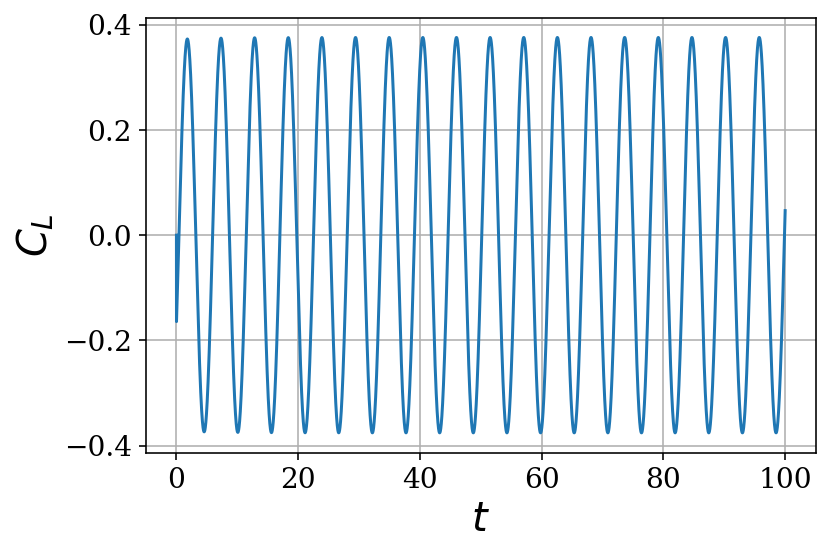

In [8]:
plt.plot(t, CL)
plt.grid()
plt.xlabel(r'$t$')
plt.ylabel(r'$C_L$')
plt.show()

In [9]:
print('Max lift: {0:0.3f}'.format(max(abs(CL))))
print('Avg drag: {0:0.3f}'.format(np.mean(CD)))

Max lift: 0.376
Avg drag: 1.500


Strouhal number: 0.1800
Uncertainty +/- 0.0100
Approximate period: 5.5556


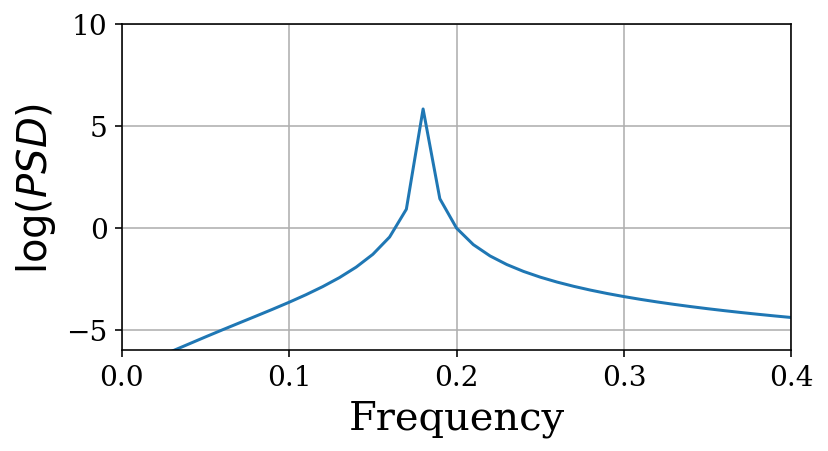

In [12]:
# Stabilizes after ~25000 time steps
dt = t[1]-t[0]
E = np.abs((dt*np.fft.fft(CL))**2)
E = E[:int(len(E)/2)]
N = len(E)
freq = np.arange(N)/(2*dt*N)

St = freq[np.argmax(E)]
print('Strouhal number: {0:0.4f}'.format(St))
print('Uncertainty +/- {0:0.4f}'.format(freq[1]-freq[0]))

print('Approximate period: {0:0.4f}'.format(1/St))

plt.figure(figsize=(6, 3))
plt.plot(freq, np.log(E), label='Mesh 1')
plt.xlim([0, 0.4])
plt.ylim([-6, 10])
plt.xlabel('Frequency')
plt.ylabel(r'$\log(PSD)$')
plt.grid()
plt.show()